# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. 

Displaying images <br>
displaying images in jupter notebook - from web - same as in HTML <br>
**< img src="https://i.imgur.com/49FNOHj.jpg">**

or locally like so <br>
**< img src="assets/bricks.jpg">**

<img src="assets/bricks.jpg">


# Import Statements

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

How many different colours does the LEGO company produce? <br>
Reading the colors.csv file in the data folder and finding the total number of unique colours by using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this task.

In [2]:
colors_df = pd.read_csv("data/colors.csv")

In [5]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


Number of unique colors (rgb) is 124

In [13]:
colors_df["name"].nunique()

135

Finding the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [22]:
# by selecting data
colors_df[colors_df["is_trans"]=="t"]["name"].count()

# using the groupby funciton
colors_df.groupby("is_trans").count()

# by using the value_counts method
colors_df.is_trans.value_counts()


f    107
t     28
Name: is_trans, dtype: int64

In [23]:
# by selecting data
colors_df[colors_df["is_trans"]=="f"]["name"].count()

# using the groupby funciton
colors_df.groupby("is_trans").count()

# by using the value_counts method
colors_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.<br>

displaying images in jupter notebook - from web - same as in HTML <br>
**< img src="https://i.imgur.com/aKcwkSx.png">**

or locally like so <br>
**< img src="assets/lego_themes.png">**

<img src="assets/lego_themes.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.


displaying images in jupter notebook - from web - same as in HTML <br>
**< img src="https://i.imgur.com/whB1olq.png">**

or locally like so <br>
**< img src="assets/lego_sets.png">**

<img src="assets/lego_sets.png">

The **<code>sets.csv</code>** data contains a list of sets over the years and the number of parts that each of these sets contained.

***Reading*** the sets.csv data and taking a look at the first and last couple of rows. 

In [24]:
sets_df = pd.read_csv("data/sets.csv")
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [28]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


Showing In which year were the first LEGO sets released and what were these sets called?

In [31]:
sets_df.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [27]:
sets_df[sets_df["year"]==sets_df.year.min()]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Finding how many different sets did **LEGO** sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [32]:
sets_df[sets_df["year"]==sets_df.year.min()]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Finding the top 5 LEGO sets with the most number of parts. 

In [34]:
sets_df.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


Using <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [51]:
sets_by_year_df = sets_df.groupby("year").count()
sets_by_year_df["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

a plot of num_sets by year excluding last tow years as the data for last two year is not complete

Showing the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_16356\3661060426.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(sets_by_year_df.index[:-2], sets_by_year_df["set_num"][:-2])


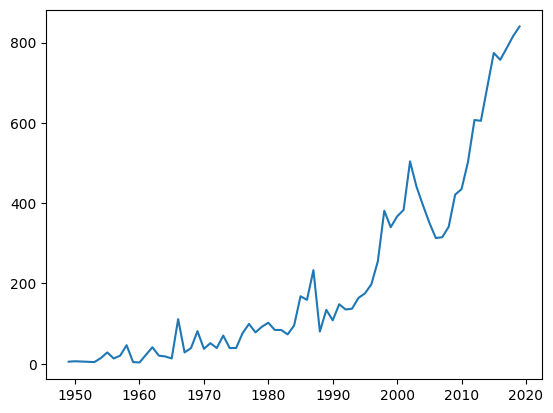

In [58]:
plt.plot(sets_by_year_df.index[:-2], sets_by_year_df["set_num"][:-2])


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

The .agg() method takes a dictionary as an argument. In this dictionary, we specify which operation we'd like to apply to each column. In our case, we just want to calculate the number of unique entries in the theme_id column by using the .nunique() method.

In [75]:
themes_by_year_df = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year_df.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


renaming a column

In [77]:
themes_by_year_df.rename(columns = {"theme_id": "nr_themes"}, inplace = True)
themes_by_year_df.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


Plotting the number of themes released by year on a line chart. Only include the full calendar years (excluding 2020 and 2021). 

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_16356\3952651423.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(themes_by_year_df.index[:-2], themes_by_year_df["nr_themes"][:-2])


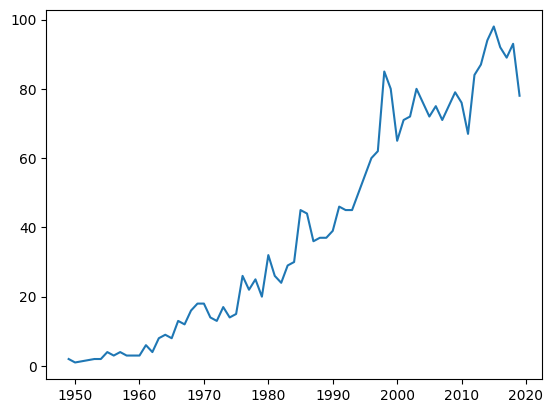

In [78]:
plt.plot(themes_by_year_df.index[:-2], themes_by_year_df["nr_themes"][:-2])

### Line Charts with Two Seperate Axes

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_16356\3052756819.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.plot(sets_by_year_df.index[:-2], sets_by_year_df["set_num"][:-2], color='g')
C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_16356\3052756819.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax2.plot(themes_by_year_df.index[:-2], themes_by_year_df["nr_themes"][:-2], color='b')


Text(0, 0.5, 'Number of Themes')

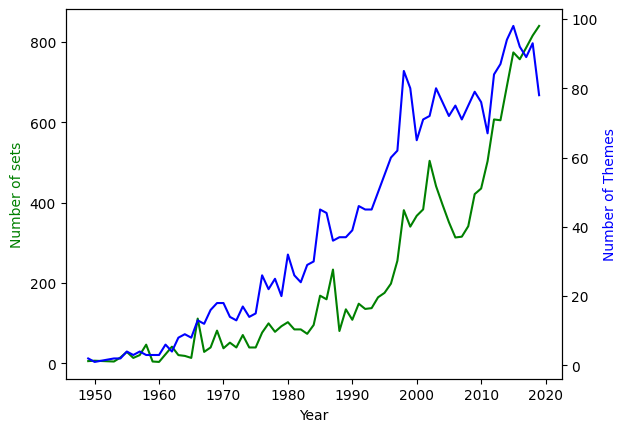

In [80]:
# get the axis
ax1 = plt.gca()

# create another axis that shares the same x-axis
ax2 = ax1.twinx()


# ploting on differetn axis and adding styling to the lines
ax1.plot(sets_by_year_df.index[:-2], sets_by_year_df["set_num"][:-2], color='g')
ax2.plot(themes_by_year_df.index[:-2], themes_by_year_df["nr_themes"][:-2], color='b')

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of sets", color = 'green')
ax2.set_ylabel("Number of Themes", color = 'blue')

Using the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [90]:
parts_per_set_df = sets_df.groupby("year").agg({"num_parts": pd.Series.mean })

In [92]:
parts_per_set_df.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. Using the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) 

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_16356\487067254.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(parts_per_set_df.index[:-2], parts_per_set_df["num_parts"][:-2])


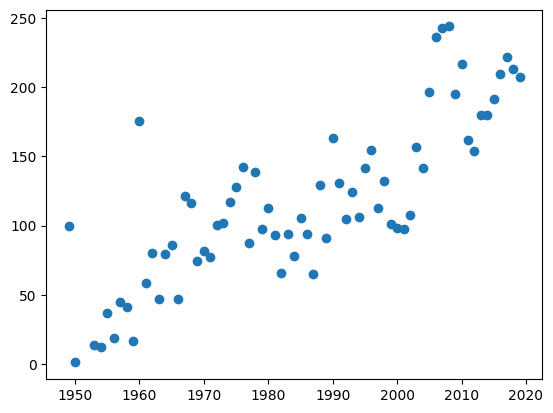

In [94]:
plt.scatter(parts_per_set_df.index[:-2], parts_per_set_df["num_parts"][:-2])


### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

The theme with id 158 is the largest theme containing 753 individual sets. We need to find the names of the themes based on the theme_id from the themes.csv file

In [112]:
sets_df["theme_id"].value_counts().head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

displaying images in jupter notebook - from web - same as in HTML <br>
**< img src="https://i.imgur.com/Sg4lcjx.png">**

or locally like so <br>
**< img src="assets/rebrickable_schema.png">**

<img src="assets/rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

First step is to explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [99]:
themes_df = pd.read_csv("data/themes.csv")
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [100]:
themes_df[themes_df["name"]=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


We can check which products corresponded to those themes in the sets.csv

In [108]:
sets_df[sets_df["theme_id"]==209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [115]:
sets_theme_count = sets_df["theme_id"].value_counts()
sets_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

To make sure we have a column with the name id, we'll convert this Pandas Series into a Pandas DataFrame.

In [117]:
sets_theme_count_df = pd.DataFrame({'id': sets_theme_count.index,
                                    'set_count': sets_theme_count.values})

sets_theme_count_df.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


To .merge() two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set on='id'

In [130]:
merged_df = pd.merge(sets_theme_count_df, themes_df, on="id")
merged_df.sort_values(by="set_count", ascending=False, inplace = True)
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


# Creating a Bar chart

ploting a bar chart with first 10 values

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_16356\286026946.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(merged_df.name[:10], merged_df.set_count[:10] )


<BarContainer object of 10 artists>

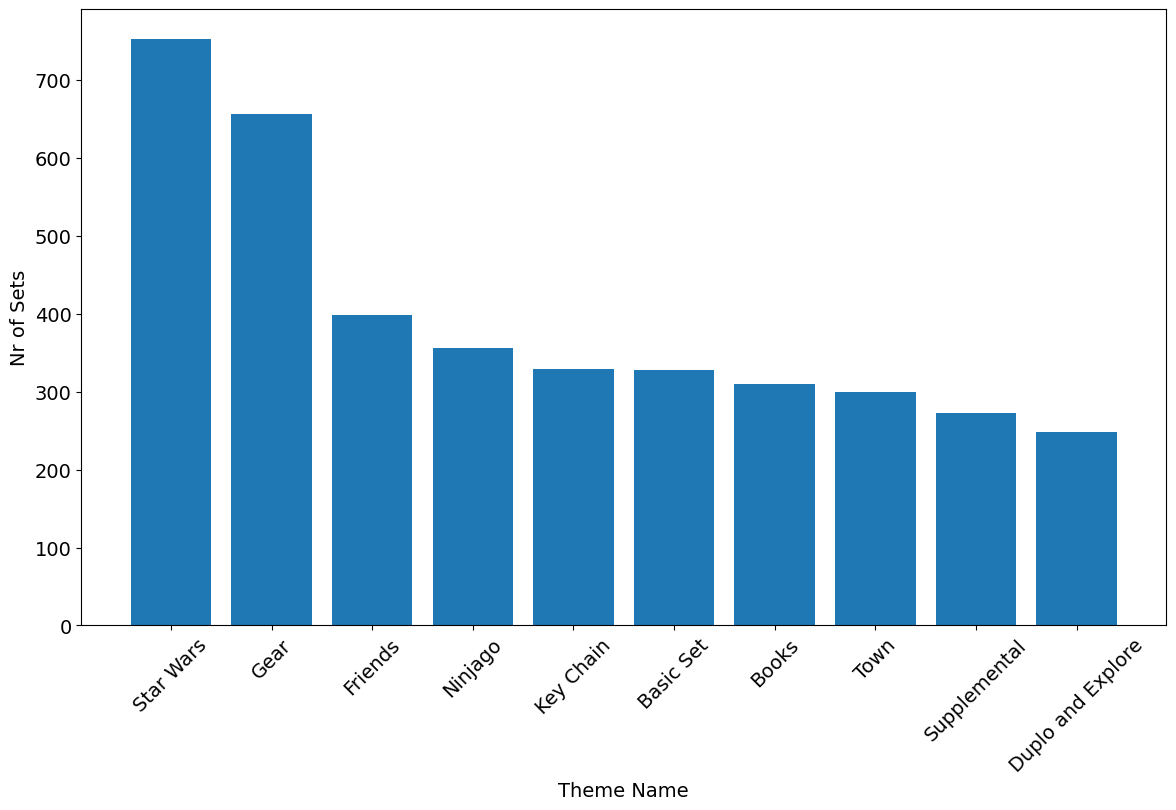

In [132]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel("Nr of Sets", fontsize=14)
plt.xlabel("Theme Name", fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10] )